# Title- Text Classification of COVID-19 Medical Abstracts using Deep Learning, Name- Thota Harshavardhani
## Motivation-
Clinical texts are unstructured and often complex. Automatically categorizing abstracts can assist in better information retrieval and medical research. This project combines language representation with neural networks to address that.

## Connection with Multimodal Learning
Recent advances in multimodal learning involve combining language, vision, and other data types. Word embeddings like Word2Vec and FastText laid the foundation for textual representations, which are now often combined with other modalities (e.g., BERT+images). This project leverages such embedding techniques to structure textual medical data, aligning with earlier language-only efforts in multimodal pipelines.

## Learning Outcomes
1. Understood the working of Skip-gram and FastText for semantic understanding.
2. Learned how to convert text into numerical vectors and use them in classification.
3. Gained experience with model training, evaluation, and visualization of embeddings.

## Reflections:
(a) What surprised you?
FastText’s ability to handle out-of-vocabulary (OOV) words using subword information worked impressively well, especially for biomedical terminology.

(b) Scope for improvement

1. Use more advanced embeddings like BioBERT or ClinicalBERT.
2. Integrate more metadata (authors, journals) for richer classification.
3. Experiment with transformer-based classification for improved accuracy.

## Install Dependencies


In [ ]:
# Force uninstall everything related to numpy and gensim
!pip uninstall -y numpy gensim scipy

# Reinstall compatible versions cleanly
!pip install --no-cache-dir numpy==1.24.4 scipy==1.10.1 gensim==4.3.1
!pip install numpy==1.26.4
import os
os.kill(os.getpid(), 9)  # Force runtime restart
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.1
Uninstalling gensim-4.3.1:
  Successfully uninstalled gensim-4.3.1
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 284.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 276.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 235.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is i

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: Operation cancelled by user


In [ ]:
import gensim
from gensim.models import Word2Vec, FastText
import numpy as np


In [ ]:
!pip install --no-cache-dir streamlit plotly matplotlib scikit-learn

import nltk
nltk.data.path.append('/content/nltk_data')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional: expands WordNet coverage
nltk.download('punkt_tab')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 242.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
cvxpy 1.6.5 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Import Libraries

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec, FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split


# Read the dataset
The dataset is obtained from [https://dimensions.figshare.com/articles/dataset/Dimensions_COVID-19_publications_datasets_and_clinical_trials/11961063?file=30718538](https://dimensions.figshare.com/articles/dataset/Dimensions_COVID-19_publications_datasets_and_clinical_trials/11961063?file=30718538)

In [ ]:
df=pd.read_csv('covid_dataset.csv')
df.shape
df.head()

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,...,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-09-01,NCT05029245,"The 8-week, Prospective, Randomized Controlled...",IntraDermal Versus Intramuscular Comirnaty® Ef...,PRIDE,"The 8-week, Prospective, Randomized controlled...",2021-08-31,2021; 2022,Phase 3,Covid19 Vaccine; Covid19,...,All,ClinicalTrials.gov,NaN,Rajavithi Hospital,grid.415633.6,Thailand,NaN,NaN,https://clinicaltrials.gov/show/NCT05029245,https://app.dimensions.ai/details/clinical_tri...
1,2021-09-01,NCT05029037,High-dose Intravenous Vitamin C (HDIVC) as Adj...,High-dose Intravenous Vitamin C (HDIVC) as Adj...,HDIVC,The objective of this study is to evaluate the...,2021-09-15,2021; 2022,Phase 3,Covid19,...,All,ClinicalTrials.gov,NaN,NaN,NaN,NaN,NaN,NaN,https://clinicaltrials.gov/show/NCT05029037,https://app.dimensions.ai/details/clinical_tri...
2,2021-09-01,NCT05029011,Low-cost Sensor System for COVID-19 Patient Mo...,Low-cost Sensor System for COVID-19 Patient Mo...,NaN,"The MediByte VTS is a low-cost, portable devic...",2021-09-01,2021; 2022,NaN,The Focus is How Well the MediByte VTS Will Mo...,...,All,ClinicalTrials.gov,Helen Driver,Queen's University; National Research Council ...,grid.410356.5; grid.24433.32,Canada; Canada,National Research Council Canada,Canada,https://clinicaltrials.gov/show/NCT05029011,https://app.dimensions.ai/details/clinical_tri...
3,2021-09-01,NCT05028998,The Impact of COVID-19-related Medication Assi...,Covid-related Opioid Treatment Policy Evaluation,COPE,Our nation is facing the COVID-19 pandemic dur...,2021-09-01,2021; 2022; 2023,NaN,Opioid-use Disorder; Alcohol Use Disorder,...,All,ClinicalTrials.gov,NaN,Boston University; Patient-Centered Outcomes R...,grid.189504.1; grid.430109.f; grid.417499.6; g...,United States; United States; United States; U...,Patient-Centered Outcomes Research Institute; ...,United States; United States,https://clinicaltrials.gov/show/NCT05028998,https://app.dimensions.ai/details/clinical_tri...
4,2021-09-01,NCT05028881,Serological Responses to SARS-CoV-2 and Their ...,Hong Kong HIV SARS-CoV-2 Serology,NaN,Immunodeficiency associated with human immunod...,2020-05-16,2020; 2021; 2022; 2023,NaN,HIV Infections; SARS-CoV-2 Infection; Vaccinat...,...,All,ClinicalTrials.gov,Shui Shan Lee,Chinese University of Hong Kong,grid.10784.3a,China,NaN,NaN,https://clinicaltrials.gov/show/NCT05028881,https://app.dimensions.ai/details/clinical_tri...


# Data Pre-processing

In [ ]:
# function to remove all urls
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

# make all text lowercase
def text_lowercase(text):
    return text.lower()

# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text
# Manually load stopwords from a file
def load_stopwords(file_path):
    with open(file_path, 'r') as f:
        stop_words = set(f.read().splitlines())
    return stop_words

# Specify the custom path
stopwords_file_path = '/content/english.txt'

# Load stopwords manually
stop_words = load_stopwords(stopwords_file_path)
print(stop_words)

# remove stopwords
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

# lemmatize Words
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

#Creating one function so that all functions can be applied at once
def preprocessing(text):

    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text
#Applying preprocessing and removing '\n' character
df['Abstract'] = df['Abstract'].astype(str).apply(preprocessing).str.replace('\n', ' ', regex=False)
df['Title'] = df['Title'].astype(str).apply(preprocessing).str.replace('\n', ' ', regex=False)


x=[word_tokenize(word) for word in df.Abstract ]   #Tokenizing data for training purpose

{'there', 'than', 'those', 'ain', "haven't", 'once', "should've", 'and', 'under', 'our', "wouldn't", "didn't", 'we', 'aren', 'she', 'ma', 'through', "don't", 'is', 'them', 'too', 'very', 'were', 'on', 'some', 'whom', 'few', 'won', 'isn', "we'll", 'how', "we're", "hasn't", "we've", 'off', 'd', 'doing', 'if', 'y', 'when', 'myself', 'have', 're', 'theirs', 'wouldn', 'couldn', "he'll", 'ours', 'can', "won't", 'while', 'be', 'hadn', 'below', 'mustn', 'not', 'against', 'or', "isn't", "i'll", 'between', 'their', 'll', 'didn', 'haven', 'nor', "couldn't", 'do', 'i', 'a', 'been', 'it', 'should', 'm', 'both', 'weren', 'only', 'now', 'shouldn', 'that', 'being', 'wasn', 'you', "she'd", 'his', 'hasn', 'where', "shouldn't", 'no', 'so', 'what', 'during', 'ourselves', 'each', 'yours', 'but', 't', 'over', "they'll", 'of', "i'd", "they've", 'herself', 'him', "it'll", 'having', "she'll", 'are', 'because', "they're", 'from', 'doesn', 'for', "you've", 'these', 've', 'its', 'had', 'such', 'your', 'am', 'migh

In [ ]:
from collections import Counter
cnt = Counter()
for text in df["Abstract"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)  #top 10 common words

[('patient', 43187),
 ('covid', 43063),
 ('study', 37002),
 ('group', 15111),
 ('treatment', 14052),
 ('day', 14029),
 ('sars', 12882),
 ('cov', 12855),
 ('disease', 12853),
 ('clinical', 12847)]

In [ ]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 90.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.2.5 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
cvxpy 1.6.5 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.


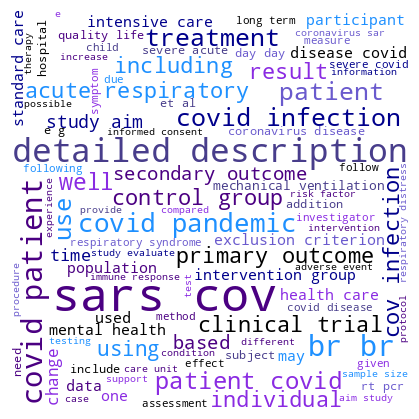

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from textwrap import wrap
import matplotlib.pyplot as plt
from pandas.core.common import flatten
import random

# Custom color function
def purple_blue_black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#000000", "#4B0082", "#483D8B", "#6A5ACD", "#1E90FF", "#00008B", "#8A2BE2"]
    return random.choice(colors)

# Flatten your list and join into a string
comment_words = flatten(x)
comment_words = ' '.join(comment_words)

# Set stopwords
stopwords = set(STOPWORDS)

# Generate the wordcloud with smaller dimensions
wordcloud = WordCloud(
    width=400,
    height=400,
    background_color='white',
    stopwords=stopwords,
    min_font_size=8,
    color_func=purple_blue_black_color_func
).generate(comment_words)

# Display smaller figure
plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# Skip-Gram Word2Vec Model Training on COVID-19 Corpus

In [ ]:
skipgram = Word2Vec(x, vector_size =50, window = 3, min_count=2,sg = 1)
print(skipgram)
skipgram.save('skipgramx1.bin')


Word2Vec<vocab=27332, vector_size=50, alpha=0.025>


In [ ]:
# Similar words - skipgram

skipgram.wv.most_similar(positive=['corona'],topn=10)

[('coronavirus', 0.8449667692184448),
 ('belongs', 0.806404173374176),
 ('covid', 0.7812236547470093),
 ('pandemia', 0.7807663679122925),
 ('covs', 0.7782667279243469),
 ('novel', 0.7690508365631104),
 ('virulent', 0.7678526043891907),
 ('declares', 0.764481782913208),
 ('ravaged', 0.7503365278244019),
 ('zoonotic', 0.7502568960189819)]

# FastText Word2Vec Model Training on COVID-19 Corpus

In [ ]:

FastText=FastText(x,vector_size=100, window=2, min_count=2, workers=5, min_n=1, max_n=2,sg=1)
FastText.save('FastText.bin')    #Saving our model
FastText = Word2Vec.load('FastText.bin')  #Loading our pretrained model

In [ ]:
# Similar words - fasttext

FastText.wv.most_similar(positive=['patient'],topn=10)


[('inpatient', 0.9013862013816833),
 ('patientsare', 0.8816366791725159),
 ('patientspatients', 0.8789613842964172),
 ('outpatient', 0.8646762371063232),
 ('patientsstudy', 0.8586322665214539),
 ('patent', 0.8576169013977051),
 ('patientsto', 0.8496409058570862),
 ('patientsprofile', 0.8458871841430664),
 ('infectionpatient', 0.8432134389877319),
 ('scorepatient', 0.8401512503623962)]

#t-SNE Visualization of Word Embeddings


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f1875cf1580>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


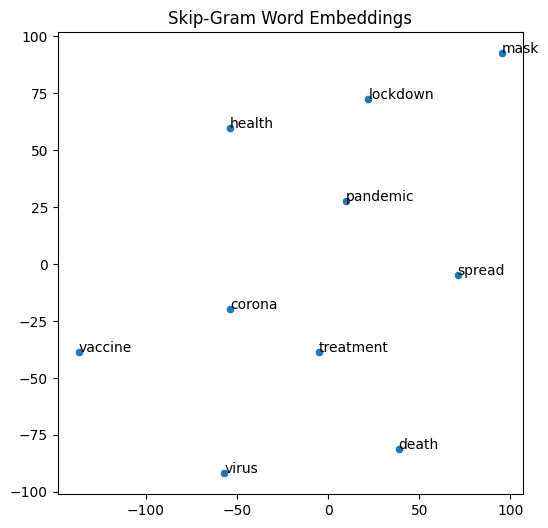

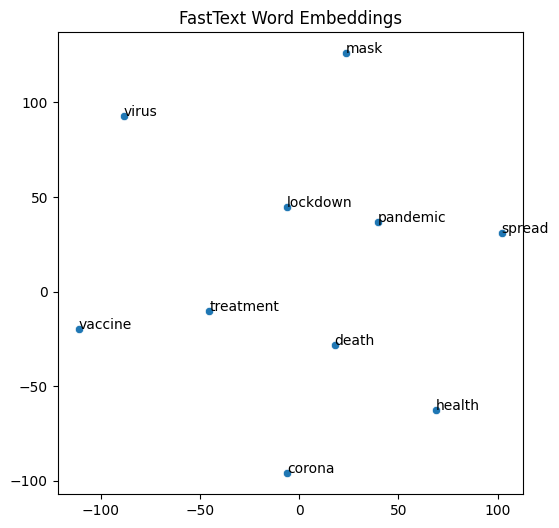

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_embeddings(model, words, title="Embedding Visualization"):
    word_vectors = []
    valid_words = []

    for word in words:
        if word in model.wv:
            word_vectors.append(model.wv[word])
            valid_words.append(word)

    if len(word_vectors) < 2:
        print("Not enough words found in the vocabulary for t-SNE.")
        return

    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(word_vectors)-1))
    embeddings_2d = tsne.fit_transform(np.array(word_vectors))

    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1])
    for i, word in enumerate(valid_words):
        plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], word)
    plt.title(title)
    plt.show()

# Replace with keywords relevant to your project
keywords = ['corona', 'pandemic', 'vaccine', 'virus', 'health', 'spread', 'death', 'lockdown', 'mask', 'treatment']

plot_embeddings(skipgram, keywords, title="Skip-Gram Word Embeddings")
plot_embeddings(FastText, keywords, title="FastText Word Embeddings")


# Using PCA for Dimensionality Reduction:
 PCA (Principal Component Analysis) is a great way to reduce the dimensionality of your word embeddings (from high-dimensional vectors, e.g., 50 or 100 dimensions) into 3 dimensions for visualization. PCA is often faster than t-SNE, though it may not capture the non-linear relationships as well.

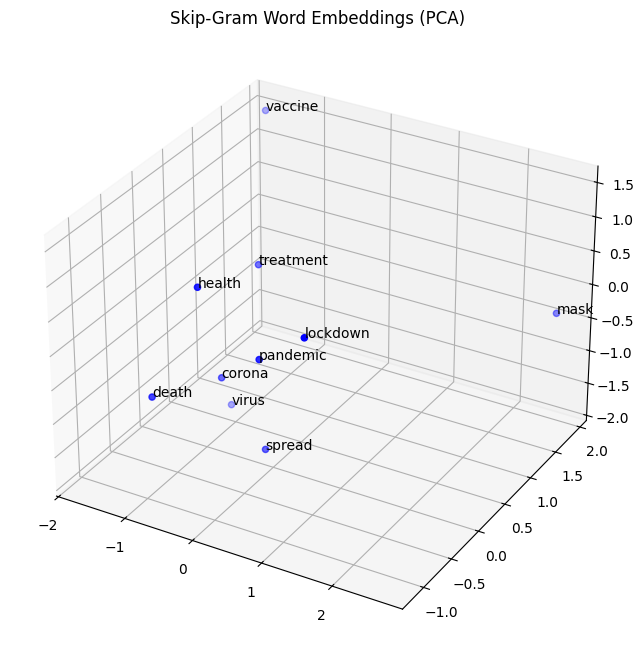

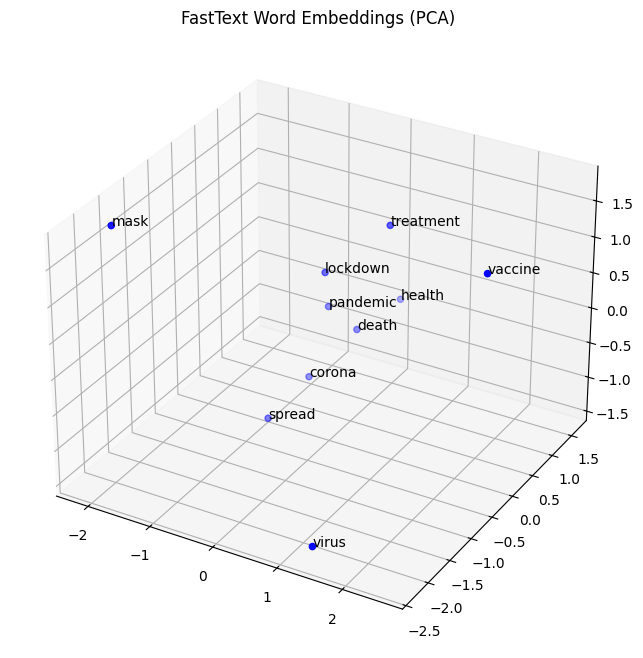

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

def plot_results_3d_pca(model, words, title="Word Embeddings in 3D"):
    word_vectors = []
    valid_words = []

    # Collect vectors for valid words
    for word in words:
        if word in model.wv:
            word_vectors.append(model.wv[word])
            valid_words.append(word)

    if len(word_vectors) < 2:
        print("Not enough words found in the vocabulary for PCA.")
        return

    # Apply PCA to reduce dimensionality from high dimensions to 3D
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(word_vectors)

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], marker='o', color='b')

    # Annotate the points with words
    for i, word in enumerate(valid_words):
        ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], word, size=10)

    ax.set_title(title)
    plt.show()

# Example list of words (replace with relevant words for your project)
keywords = ['corona', 'pandemic', 'vaccine', 'virus', 'health', 'spread', 'death', 'lockdown', 'mask', 'treatment']

# Visualize Skip-Gram embeddings in 3D (with PCA)
plot_results_3d_pca(skipgram, keywords, title="Skip-Gram Word Embeddings (PCA)")

# Visualize FastText embeddings in 3D (with PCA)
plot_results_3d_pca(FastText, keywords, title="FastText Word Embeddings (PCA)")


# Out-of-Vocabulary (OOV) Word Handling: Skip-Gram vs FastText
* Skip-Gram throws an error for words that were not seen during training, as it learns a single vector per word.

* FastText handles OOV words by breaking them down into subword n-grams, allowing it to generate similar word vectors even for unseen words.

This makes FastText more robust to new or rare words.

In [ ]:
print(skipgram.wv.most_similar('immunoresponse'))  #error



KeyError: "Key 'immunoresponse' not present in vocabulary"

In [ ]:
print(FastText.wv.most_similar('immunoresponse')) #works

[('immunodepression', 0.8944680094718933), ('immunosuppressed', 0.8870605230331421), ('immunise', 0.8852710723876953), ('immunonutrition', 0.8837081789970398), ('immunodeficient', 0.8823595643043518), ('immunospot', 0.8807485103607178), ('immunofree', 0.8788434267044067), ('immunosuppression', 0.8774117231369019), ('immunisation', 0.8763427138328552), ('immunpathogenesis', 0.8755009174346924)]


# Abstract Classification using Word Embeddings and Neural Network
We classify research abstracts into categories like "Vaccine", "Lockdown", "Treatment", and more using a simple rule-based labeling system. Then, we compute average word embeddings for each abstract using the trained Word2Vec (Skip-gram) model and feed these vector representations into a neural network for classification. The model is trained using Keras and evaluated for performance.

In [ ]:
# Temporary rule-based labeling
def label_category(text):
    if isinstance(text, str):
        text = text.lower()
        if 'vaccine' in text or 'immunization' in text:
            return 'Vaccine'
        elif 'lockdown' in text or 'quarantine' in text:
            return 'Lockdown'
        elif 'treatment' in text or 'therapy' in text:
            return 'Treatment'
        elif 'mask' in text or 'ppe' in text:
            return 'Protection'
        else:
            return 'Other'
    return 'Other'


df['Category'] = df['Abstract'].apply(label_category)

import numpy as np

def get_avg_embedding(text, model):
    words = text.split()
    valid_vectors = [model.wv[word] for word in words if word in model.wv]
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

X = df['Abstract'].apply(lambda x: get_avg_embedding(x, skipgram))  # Use FastText here if you want
X = np.stack(X.values)

# Convert labels to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Category'])


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(le.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()
#train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=32)
#test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict a few samples
predictions = model.predict(X_test[:5])
for i, pred in enumerate(predictions):
    print(f"Text: {df['Abstract'].iloc[i][:100]}...")
    print(f"Actual: {le.classes_[y_test[i]]}, Predicted: {le.classes_[np.argmax(pred)]}")
    print("---")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,109 (59.02 KB)

 Trainable params: 15,109 (59.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5084 - loss: 1.1921 - val_accuracy: 0.6480 - val_loss: 0.8853
Epoch 2/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6564 - loss: 0.8850 - val_accuracy: 0.6748 - val_loss: 0.8195
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6722 - loss: 0.8453 - val_accuracy: 0.6863 - val_loss: 0.7963
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6862 - loss: 0.8106 - val_accuracy: 0.6979 - val_loss: 0.7751
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6747 - loss: 0.8136 - val_accuracy: 0.7069 - val_loss: 0.7674
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6988 - loss: 0.7840 - val_accuracy: 0.7135 - val_loss: 0.7521
Epoch 7/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6987 - loss: 0.7772 - val_accuracy: 0.7045 - val_loss: 0.7525
Epoch 8/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7053 - loss: 0.7698 - val_accuracy: 0.

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import BatchNormalization
model = Sequential([
    keras.Input(shape=(X.shape[1],)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
#train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=32)
#test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict a few samples
predictions = model.predict(X_test[:5])
for i, pred in enumerate(predictions):
    print(f"Text: {df['Abstract'].iloc[i][:100]}...")
    print(f"Actual: {le.classes_[y_test[i]]}, Predicted: {le.classes_[np.argmax(pred)]}")
    print("---")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 256)            │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,069 (219.02 KB)

 Trainable params: 55,301 (216.02 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5224 - loss: 1.2375 - val_accuracy: 0.5058 - val_loss: 1.0935
Epoch 2/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6605 - loss: 0.8703 - val_accuracy: 0.6760 - val_loss: 0.8291
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6834 - loss: 0.8164 - val_accuracy: 0.6748 - val_loss: 0.8172
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6884 - loss: 0.7974 - val_accuracy: 0.7065 - val_loss: 0.7596
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6939 - loss: 0.7806 - val_accuracy: 0.7077 - val_loss: 0.7577
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6829 - loss: 0.7985 - val_accuracy: 0.7176 - val_loss: 0.7387
Epoch 7/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6907 - loss: 0.7814 - val_accuracy: 0.6908 - val_loss: 0.7857
Epoch 8/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6980 - loss: 0.7739 - val_accuracy: 0.